### Problem Statement

You are a data scientist / AI engineer working on an unsupervised learning problem. You have been provided with a dataset named **`"wine_clustering_data.csv"`**, which includes information about various attributes from a chemical analysis of wines. The dataset comprises the following columns:

- `alcohol:` Alcohol content in the wine.
- `malic_acid:` Malic acid content in the wine.
- `ash:` Ash content in the wine.
- `ash_alcanity:` Alcalinity of the ash in the wine.
- `magnesium:` Magnesium content in the wine.
- `total_phenols:` Total phenolic content in the wine.
- `flavanoids:` Flavanoid content in the wine.
- `nonflavanoid_phenols:` Nonflavanoid phenolic content in the wine.
- proanthocyanins:` Proanthocyanin content in the wine.
- `color_intensity:` Color intensity of the wine.
- `hue:` Hue of the wine.
- `od280:` OD280/OD315 ratio of the wine.
- `proline:` Proline content in the wine.

Your task is to use this dataset to apply `DBSCAN clustering` to identify natural groupings based on these chemical properties. You will also visualize the clusters.

**Dataset credits:** UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine)

**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


### Task 1: Data Preparation and Exploration

1. Import the data from the `"wine_clustering_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use `describe()` to get the summary statistics for each feature.
5. Visualize the distribution of each feature using histograms.

In [2]:
df = pd.read_csv("wine_clustering_data.csv")
df.head()


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape, df.info()
X = df.values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    int64  
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Task 2: Standardization

1. Use `StandardScaler` to standardize the numerical features, ensuring they have a mean of 0 and a standard deviation of 1, bringing all features onto a common scale.

In [5]:
linked = linkage(X_scaled, method="ward")


### Task 3: Initial DBSCAN Clustering

1. Apply DBSCAN clustering to the standardized data with `eps=2 and min_samples=2`.
2. Add the cluster labels to the original DataFrame.
3. Visualize the clusters using a scatter plot for a pair of features (e.g., alcohol and malic_acid).

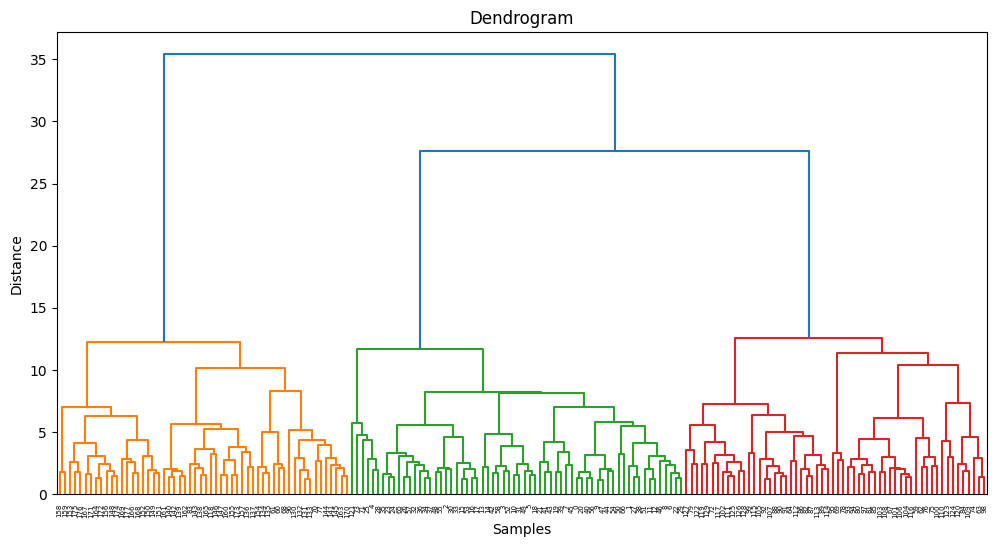

In [6]:
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [7]:
hc = AgglomerativeClustering(
    n_clusters=3,
    metric="euclidean",
    linkage="ward"
)

clusters = hc.fit_predict(X_scaled)


In [8]:
df["Cluster"] = clusters
df.head()


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


### Task 4: Parameter Tuning

1. Experiment with different values of eps (2, 3.5, 4) and min_samples (2, 4, 6) to see how the clustering results change.
2. Visualize the clusters using scatter plots with different parameter settings for a pair of features (e.g., alcohol and malic_acid).

In [9]:
df["Cluster"].value_counts()


Cluster
2    64
0    58
1    56
Name: count, dtype: int64

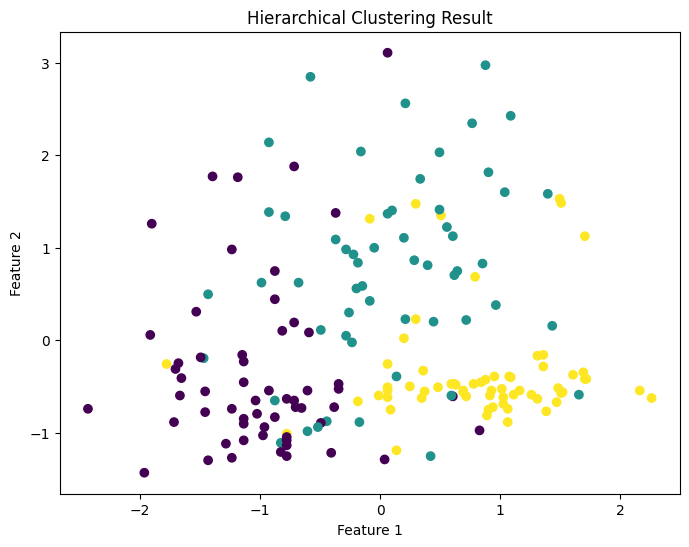

In [10]:
plt.figure(figsize=(8, 6))

plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=clusters
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hierarchical Clustering Result")
plt.show()
